In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
import re
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.metrics import accuracy_score
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
harmful_2_df = pd.read_csv('harmful_2_learning500.csv')


harmful_url_dic = {'sex': 1, 'porn': 1, 'gay': 1, 'movi': 1, 'movie': 1, 'tube': 1, 'pornhub':1,
                   'xxx': 1, 'fuck': 1, 'pic': 1, 'dick': 1, 'hot': 1,
                   'anal': 1, 'asian': 1, 'adult': 1, 'shemal': 1, 'cartoon':1,
                   'pictur': 1, 'picture': 1, 'lesbian': 1,

                   'teen': 2, 'big': 2, 'girl': 2, 'pussi': 2, 'ass': 2, 'tit': 2, 'amateur': 2, 'matur': 2, 'boy': 2,
                   'babe': 2, 'cock': 2,'milf': 2, 'sexi': 2, 'bebe':2, 'nud':2,
                   'pic': 2, 'blond': 2, 'nude': 2, 'hairi': 2, 'blowjob': 2, 'cum': 2, 'young': 2,
                   'hardcor': 2, 'hardcore': 2 ,

                   'game': 3, 'casino': 3, 'play': 3, 'onlin': 3,'online':3, 
                   'card': 3,  'race': 3,  'admin': 3,

                   'escort': 4, 'london': 4, 'servic': 4, 'service':4, 'agenc': 4,
                   'galleri': 4,'massag': 4, 'model': 4, 'femal': 4, 'fmale': 4,
                   'vip': 4, 'book': 4, 'uk': 4, 'russian': 4, 'profil': 4,
                   'busti': 4, 'class': 4, 'adult': 4, 'york': 4,
                   
                   'cam':5, 'video':5, 'chat':5, 'webcam': 5,
                   
                   'domain':7, 'domains':7, 'gateway':7
}

def word_idx(top20):
    list = top20.split()
    for word in list:
        if word in harmful_url_dic:
            return harmful_url_dic[word]
            break;
    return 0

def img_idx(num):
    if num < 10 : return 0
    elif (num >=10)&(num<50): return 1
    elif (num >=50)&(num<100): return 2
    elif (num >=100)&(num<200): return 3
    else: return 4

def child_idx(num):
    if num < 5 : return 0
    elif (num >=5)&(num<10): return 1
    elif (num >=10)&(num<25): return 2
    else: return 3

def img_child(img, child):
    if img >= child: return 0
    else: return 1

def target(wi, ic, hw):
    if hw < 0.125 :
        if wi == 0: return 0
        elif wi == 7: return 7
        else: return wi
        
    elif hw >= 0.125 and hw < 0.5:
        if ic == 1 : return 6
        else: return wi
        
    # harmful_weight >= 0.5    
    else:
        if wi == 0 or wi ==7 : return 7
        elif ic == 1: return 6
        else: return wi
harmful_2_df['top_word'] = harmful_2_df['top_word'].fillna(" ")
harmful_2_df['top_word'] = harmful_2_df['top_word'].apply(lambda x : re.sub("[^a-zA-Z]"," ", x))

In [156]:
from sklearn.ensemble import RandomForestClassifier

harmful_2_df['word_idx'] = harmful_2_df['top_word'].apply(lambda x : word_idx(x))
harmful_2_df['img_child'] = harmful_2_df.apply(lambda x : img_child(x['img_num'],x['child_num']),axis=1)
harmful_2_df['img_num'] = harmful_2_df['img_num'].apply(lambda x : img_idx(x))
harmful_2_df['child_num'] = harmful_2_df['child_num'].apply(lambda x : child_idx(x))
 
harmful_2_df['target'] = harmful_2_df.apply(lambda x : target(x['word_idx'],x['img_child'],x['harmful_weight']),axis=1)

harmful_2_df.head(3)

,url_id,url,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight,top_word,word_idx,img_child,target
0,5,madteenies.com,2,10,3,1,1,0.750,big password free login mad madthumb porn porn...,2,0,2
1,15,porntube.com,1,10,4,1,1,0.750,big anal blond fuck babe pussi ass hard hot in...,2,0,2
2,51,mydickdorms.com,1,3,7,3,2,0.575,bareback author dude first last licens mg mode...,4,0,4


In [157]:
harmDF = harmful_2_df[['url_harmful_idx','img_num','child_num','harmful_weight','word_idx']]
harmDF.data = harmDF.values.tolist()
harmDF.target = harmful_2_df[['target']]
harmDF.feature_names=['url_harmful_idx','img_num','child_num','harmful_weight','word_idx']
harmDF.target_names=['none','porn','teen','gambling','escort','cam','hub','domain']
harmDF.head(3)

,url_harmful_idx,img_num,child_num,harmful_weight,word_idx
0,2,1,1,0.750,2
1,1,1,1,0.750,2
2,1,3,2,0.575,4


In [158]:
X_train , X_test , y_train , y_test = train_test_split(harmDF.data, harmDF.target,
                                                       test_size=0.3,  random_state=33)
rnd_clf = RandomForestClassifier(n_estimators=250, max_depth=9 , n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

accuracy = accuracy_score(y_test , y_pred_rf)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.8867


In [159]:
X_features = np.array(harmDF.data)
y_label = np.array(harmDF.target)
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.3, random_state=0 )
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.8867


In [162]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.metrics import f1_score 

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred,average='macro')
    recall = recall_score(y_test , pred, average='macro')
    # F1 스코어 추가
    f1 = f1_score(y_test,pred, average='macro')
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
    
get_clf_eval(y_test,pred)
pred

오차 행렬
[[21  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  1  0]
 [ 0  3 20  1  0  0  1  0]
 [ 0  0  0  7  0  0  0  0]
 [ 0  0  0  0 22  0  1  0]
 [ 0  0  0  1  3 13  1  0]
 [ 1  1  0  0  1  1 19  0]
 [ 0  0  0  0  0  1  0  8]]
정확도: 0.8867, 정밀도: 0.8904, 재현율: 0.8940, F1:0.8870


array([6, 1, 1, 1, 2, 6, 1, 0, 5, 4, 4, 0, 4, 0, 7, 0, 7, 1, 1, 1, 1, 6, 7,
       2, 1, 1, 2, 5, 1, 6, 0, 6, 4, 4, 7, 0, 4, 4, 4, 7, 1, 6, 3, 0, 0, 2,
       1, 4, 1, 5, 4, 3, 1, 4, 0, 4, 4, 6, 4, 1, 6, 1, 6, 5, 0, 1, 1, 0, 2,
       2, 4, 6, 2, 0, 6, 4, 3, 4, 0, 2, 0, 6, 5, 1, 3, 0, 2, 1, 5, 2, 2, 4,
       6, 4, 5, 6, 6, 7, 0, 6, 5, 2, 1, 3, 5, 3, 1, 4, 0, 2, 6, 4, 1, 1, 5,
       4, 7, 1, 2, 4, 2, 6, 5, 6, 0, 5, 5, 0, 6, 0, 0, 1, 4, 4, 2, 3, 3, 2,
       2, 6, 5, 2, 2, 6, 0, 7, 4, 3, 5, 6], dtype=int64)

In [134]:
rf_clf1 = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=1)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))


예측 정확도: 0.8960


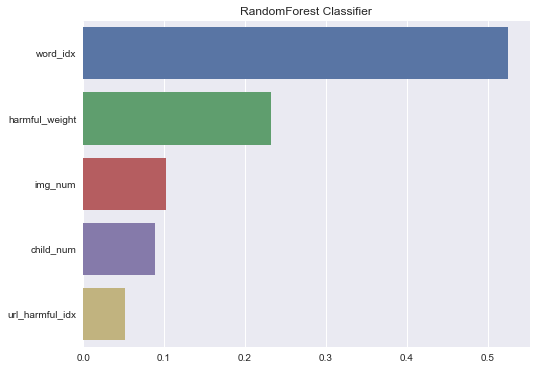

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=harmDF.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=(8,6))
plt.title('RandomForest Classifier')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()